### Import librairies
Nous importons les bibliothèque fondamentale pour la programme

In [22]:
import pandas as pd
import numpy as np

### Import donnée
Nous allons importer les données des trainSet et testSet dans les features et la variable à déviner

In [23]:
def importData(path):
    columnNames=["ECP","RC","MIN","MAX","MEAN","START","END","DURATION","CV","A1","A2","A3","A4","FP"]
    #columnNames=["RC","MIN","MAX","MEAN","START","END","DURATION","CV","A1","A2","A3","A4","FP"]
    delimit=','
    data = pd.read_csv(path, names=columnNames, sep=delimit)
    #data = data.drop(columns="ECP")
    return data

In [41]:
pathTrain='../3-DataSet/dataFinale/p30/dataSet_p30.csv'
#pathTrain='../3-DataSet/20200122/95/trainSets95.csv'
trainSet = importData(pathTrain)

trainSet.head(10)

,ECP,RC,MIN,MAX,MEAN,START,END,DURATION,CV,A1,A2,A3,A4,FP
0,1007CEA7AC1F3681EAC5106D15,2,-66.0,-62.0,-64.000000,1581422578007262,1581422578092194,84932,-0.031250,2,0,0,0,1
1,1007CEA7AC1F3681EAC5106D1516,2,-59.0,-57.5,-58.250000,1581422089897767,1581422089963488,65721,-0.012876,2,0,0,0,1
2,1007CEA7AC1F3681EAC5106D17,10,-66.5,-59.5,-62.950000,1581422399674506,1581422405261641,5587135,-0.033407,10,0,0,0,1
3,1007CEA7AC1F3681EAC5106D18,1,-65.0,-65.0,-65.000000,1581421166877996,1581421166877996,0,-0.000000,0,1,0,0,1
4,1007CEA7AC1F3681EAC5106D1819,2,-62.0,-60.5,-61.250000,1581421595360382,1581421595392241,31859,-0.012245,0,2,0,0,1
5,1007CEA7AC1F3681EAC5106D51,7,-66.5,-48.5,-58.571429,1581421034387374,1581421037220379,2833005,-0.124330,6,1,0,0,0
6,1007CEA7AC1F3681EAC5106D52,13,-63.0,-52.0,-58.615385,1581420810659230,1581420812942677,2283447,-0.056795,9,3,1,0,0
7,1007CEA7AC1F3681EAC5106D53,7,-63.5,-47.5,-55.428571,1581420837310711,1581420839061223,1750512,-0.105466,6,0,1,0,0
8,1007CEA7AC1F3681EAC5106D54,7,-62.5,-45.5,-52.642857,1581420275336706,1581420277195310,1858604,-0.116072,5,0,2,0,0
9,1007CEA7AC1F3681EAC5106D55,8,-67.0,-59.5,-61.687500,1581420319811765,1581420322715338,2903573,-0.049955,6,2,0,0,0


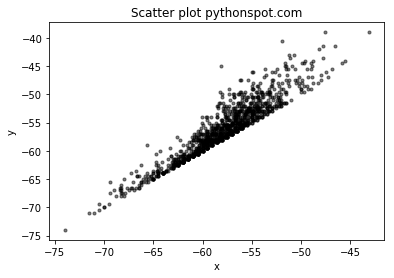

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Create data
N = 500
x = trainSet['MEAN']
y = trainSet['MAX']
colors = (0,0,0)
area = np.pi*3

# Plot
plt.scatter(x, y, s=area, c=colors, alpha=0.5)
plt.title('Scatter plot pythonspot.com')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

### Import plot librairie
Il est temps de voir comment les élements X et FP sont liées les uns aux autres avec un graphe

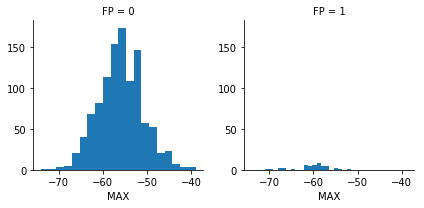

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

g = sns.FacetGrid(trainSet, col='FP')
g.map(plt.hist, 'MAX', bins=20)

### Split Data
Nous allons découper les données d'apprentissage pour avoir la partie feature et y

In [42]:
#features=trainSet.loc[:,'RC':'A4']
X = np.array(trainSet.iloc[:,1:-1]).astype(int)
y = np.array(trainSet['FP'])
print(X.shape)
print(trainSet.shape)
print(y.shape)

(2634, 12)
(2634, 14)
(2634,)


### Normalize Data
Nous allons 

In [43]:
from sklearn import preprocessing
X = preprocessing.normalize(X)

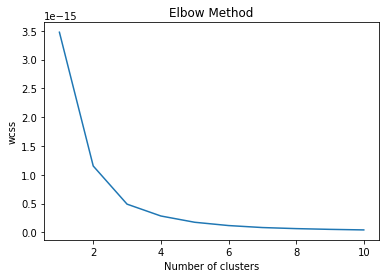

In [44]:
from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('wcss')
plt.show()

### Trainning
Nous allons 

In [49]:
k=3
#from sklearn.preprocessing import LabelEncoder
#from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=k, max_iter=600, algorithm = 'auto')
kmeans.fit(X)
#y_kmeans=kmeans.fit_predict(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=600,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [50]:
correct = 0
for i in range(len(X)):
    predict_me = np.array(X[i].astype(float))
    predict_me = predict_me.reshape(-1, len(predict_me))
    prediction = kmeans.predict(predict_me)
    if prediction[0] == y[i]:
        correct += 1

print("Score: ", correct/len(X))

Score:  0.8473804100227791


In [51]:
y_pred = kmeans.predict(X)
predict_data=trainSet
predict_data['IS_FP']=y_pred

predict_data.head(50)

,ECP,RC,MIN,MAX,MEAN,START,END,DURATION,CV,A1,A2,A3,A4,FP,IS_FP,crossValid
0,1007CEA7AC1F3681EAC5106D15,2,-66.0,-62.0,-64.000000,1581422578007262,1581422578092194,84932,-0.031250,2,0,0,0,1,0,-0.000000e+00
1,1007CEA7AC1F3681EAC5106D1516,2,-59.0,-57.5,-58.250000,1581422089897767,1581422089963488,65721,-0.012876,2,0,0,0,1,0,-0.000000e+00
2,1007CEA7AC1F3681EAC5106D17,10,-66.5,-59.5,-62.950000,1581422399674506,1581422405261641,5587135,-0.033407,10,0,0,0,1,0,-0.000000e+00
3,1007CEA7AC1F3681EAC5106D18,1,-65.0,-65.0,-65.000000,1581421166877996,1581421166877996,0,-0.000000,0,1,0,0,1,0,-0.000000e+00
4,1007CEA7AC1F3681EAC5106D1819,2,-62.0,-60.5,-61.250000,1581421595360382,1581421595392241,31859,-0.012245,0,2,0,0,1,0,-0.000000e+00
5,1007CEA7AC1F3681EAC5106D51,7,-66.5,-48.5,-58.571429,1581421034387374,1581421037220379,2833005,-0.124330,6,1,0,0,0,0,-0.000000e+00
6,1007CEA7AC1F3681EAC5106D52,13,-63.0,-52.0,-58.615385,1581420810659230,1581420812942677,2283447,-0.056795,9,3,1,0,0,0,-0.000000e+00
7,1007CEA7AC1F3681EAC5106D53,7,-63.5,-47.5,-55.428571,1581420837310711,1581420839061223,1750512,-0.105466,6,0,1,0,0,0,-0.000000e+00
8,1007CEA7AC1F3681EAC5106D54,7,-62.5,-45.5,-52.642857,1581420275336706,1581420277195310,1858604,-0.116072,5,0,2,0,0,0,-0.000000e+00
9,1007CEA7AC1F3681EAC5106D55,8,-67.0,-59.5,-61.687500,1581420319811765,1581420322715338,2903573,-0.049955,6,2,0,0,0,0,-0.000000e+00


In [52]:
from sklearn import metrics
from sklearn.model_selection import cross_val_score

def printCv(clf, xFeatures, y_true, size):
    print("Cross validation: \n",cross_val_score(clf, xFeatures, y_true, cv=5))

def printMetrics(y, y_pred):
    print("Confusion Matrix\n",metrics.confusion_matrix(y, y_pred))
    print("Accuracy: ", metrics.accuracy_score(y, y_pred))
    print("Ajusted Rand Square",metrics.adjusted_rand_score(y, y_pred))
      
printMetrics(y,y_pred)
predict_data['crossValid'] = cross_val_score(kmeans, X, y, cv=len(trainSet))

Confusion Matrix
 [[2231   24   65]
 [ 309    1    4]
 [   0    0    0]]
Accuracy:  0.847380410023
Ajusted Rand Square -0.0269693233026


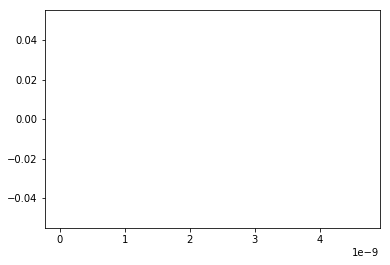

In [20]:
centroids = kmeans.cluster_centers_

#plt.figure(figsize=(8, 6))
for i in range(len(X)):
    #print(trainSet.iloc[i][1])
    plt.plot(X[i][6], X[i][7], colors[y_pred[i]], markersize = 5)
    

#plt.scatter(centroids[:, 0],centroids[:, 1], marker = "x", s=50, linewidths = 5, zorder = 10,c='black')
plt.legend()
plt.show()

In [21]:
#LoadData
path='../2-TransformedData/testSet_2020-Jan-29-21_10_32.csv'

#path='../2-TransformedData/data2_2020-Jan-31-10_55_51.csv'
#toPredict = pd.read_csv(path,names=["RC","MIN","MAX","MEAN","START","END","DURATION","CV","A1","A2","A3","A4"], sep=',')
#XFeature = np.array(toPredict).astype(int)

toPredict = pd.read_csv(path,names=["ECP","RC","MIN","MAX","MEAN","START","END","DURATION","CV","A1","A2","A3","A4","FP"], sep=',')

XFeature = np.array(toPredict.loc[:,'RC':'A4']).astype(int)
XFeature = preprocessing.normalize(XFeature)
y_p = kmeans.predict(XFeature)

toPredict['IS_FP']=y_p

toPredict

,ECP,RC,MIN,MAX,MEAN,START,END,DURATION,CV,A1,A2,A3,A4,FP,IS_FP
0,245390003868,210,-67.0,-58.5,-61.957143,1579699702957564,1579699747867390,44909826,-0.020082,7,5,198,0,1,1
1,245390003869,174,-63.0,-56.5,-60.583333,1579699702975300,1579699745158768,42183468,-0.016437,0,0,173,1,1,0
2,300000000000000000017856,1,-63.5,-63.5,-63.500000,1579699733327556,1579699733327556,0,-0.000000,0,1,0,0,1,0
3,300000000000000000017857,304,-63.5,-56.0,-57.626645,1579699703039548,1579699747950958,44911410,-0.015811,0,2,1,301,1,2
4,300000000000000000017858,1,-57.5,-57.5,-57.500000,1579699717786689,1579699717786689,0,-0.000000,0,0,1,0,1,0
5,30000000000000000001785C,287,-58.5,-53.0,-54.932056,1579699702951407,1579699745675824,42724417,-0.017785,3,0,284,0,1,2
6,30000000000000000001785D,309,-64.5,-58.0,-61.085761,1579699703042235,1579699748151155,45108920,-0.014276,2,11,0,296,1,2
7,30000000000000000001785E,4,-60.0,-58.5,-59.500000,1579699713693963,1579699714336538,642575,-0.010292,4,0,0,0,0,0
8,300000000000000000017862,11,-60.5,-54.0,-57.000000,1579699710512550,1579699715069601,4557051,-0.036071,5,0,6,0,0,0
9,300000000000000000017863,18,-60.5,-52.5,-57.305556,1579699731195273,1579699733021167,1825894,-0.037713,0,10,0,8,0,0


In [33]:
#Export predict data
pathExport='../6-ClassifiedData/20200217kmeans_predict.csv'
predict_data.to_csv(pathExport, index = None, header=True)